# 12wk-1: NYCTaxi 자료 분석 (1)

최규빈  
2023-11-20

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/12wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-wFUcEr7JtSb7MWUYl6QrW_&si=CmWA765p0mnwWTGA>

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

In [2]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

# 3. 예비학습: 뉴욕

## A. 뉴욕의 주요명소

In [3]:
# 뉴욕의 주요 명소 및 위치를 데이터프레임으로 생성
nyc_landmarks = {
    "Name": ["Wall Street", "Midtown Manhattan", "Times Square", 
             "Central Park", "Statue of Liberty", "Forest Park", "Citi Field"],
    "Latitude": [40.7074, 40.7549, 40.7580, 40.785091, 40.6892, 40.7028, 40.7571],
    "Longitude": [-74.0113, -73.9840, -73.9855, -73.968285, -74.0445, -73.8495, -73.8458]
}

df_nyc_landmarks = pd.DataFrame(nyc_landmarks)
df_nyc_landmarks

## B. 시각화

In [4]:
fig = px.scatter_mapbox(
    data_frame = df_nyc_landmarks,
    lat = 'Latitude',
    lon = 'Longitude',
    hover_data = 'Name',
    #---#
    mapbox_style = 'carto-positron',
    zoom=10,
    width=750,
    height=600
)
fig.update_traces(
    marker = {
        'size':15, 
        'color': 'red', 
        'opacity':0.5
    }
)
fig.show(config={'scrollZoom':False})

## C. ChatGPT 설명

### ChatGPT

뉴욕은 세계에서 가장 중요한 금융 및 문화 중심지 중 하나로, 금융권 밀집
지역과 유명한 관광 명소가 많습니다. 다음은 뉴욕의 대표적인 금융권 밀집
지역과 주요 관광 명소 중 일부입니다:

***금융권 밀집 지역***

1.  **월스트리트 (Wall Street)**:
    -   월스트리트는 세계 금융의 상징이며, 뉴욕증권거래소(NYSE)와 많은
        은행 및 금융 기관의 본사가 위치해 있습니다.
    -   이 지역은 글로벌 금융 및 경제의 중심지로 간주되며,
        ’월스트리트’는 종종 미국 금융 산업 전체를 지칭하는 용어로
        사용됩니다.
2.  **미드타운 (Midtown)**:
    -   미드타운 맨해튼은 많은 기업 본사, 유명 호텔, 쇼핑 지역 및
        레스토랑이 밀집해 있는 지역입니다.
    -   이 지역에는 국제연합 본부, 메이시스 백화점, 록펠러 센터 등이
        위치해 있습니다.

***주요 관광 명소***

1.  **타임스퀘어 (Times Square)**:
    -   타임스퀘어는 뉴욕의 상징적인 관광 명소 중 하나로, 번화한
        광고판과 네온사인으로 유명합니다.
    -   이곳은 맨해튼의 중심부에 위치하며, 연극과 뮤지컬이 상연되는
        브로드웨이 극장가로도 유명합니다.
2.  **센트럴 파크 (Central Park)**:
    -   센트럴 파크는 뉴욕 시의 대표적인 공원으로, 도심 속 자연을 즐길
        수 있는 아름다운 장소입니다.
    -   공원 내에는 호수, 산책로, 놀이터, 스포츠 시설 등이 마련되어
        있으며, 다양한 문화 행사와 공연이 열립니다.
3.  **자유의 여신상 (Statue of Liberty)**:
    -   자유의 여신상은 뉴욕 항구에 위치한 미국의 상징적인 조각상입니다.
    -   자유의 여신상은 미국의 자유와 민주주의를 상징하며, 세계적으로
        유명한 관광 명소입니다.
4.  **포레스트 공원 (Forest Park)**:
    -   이 공원은 뉴욕시 퀸즈 구역에 위치해 있습니다.
    -   포레스트 공원은 약 538 에이커의 면적을 가지고 있으며, 다양한
        레크리에이션 활동 및 자연 트레일을 제공합니다.
5.  **시티 필드 (Citi Field)**:
    -   시티 필드는 뉴욕시 퀸즈 구역에 위치한 야구 경기장입니다.
    -   이 경기장은 메이저 리그 야구의 뉴욕 메츠 팀의 홈 구장으로
        사용됩니다.

# 4. NYCTaxi 자료

> ref:
> <https://www.kaggle.com/competitions/nyc-taxi-trip-duration/overview>

## A. 데이터불러오기

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/NYCTaxi.csv")
df.columns

In [6]:
df.head()

## B. 데이터 설명

`-` Kaggle의 설명

-   `id`: a unique identifier for each trip
-   `vendor_id`: a code indicating the provider associated with the trip
    record
-   `pickup_datetime`: date and time when the meter was engaged
-   `dropoff_datetime`: date and time when the meter was disengaged
-   `passenger_count`: the number of passengers in the vehicle (driver
    entered value)
-   `pickup_longitude`: the longitude where the meter was engaged
-   `pickup_latitude`: the latitude where the meter was engaged
-   `dropoff_longitude`: the longitude where the meter was disengaged
-   `dropoff_latitude`: the latitude where the meter was disengaged
-   `store_and_fwd_flag`: This flag indicates whether the trip record
    was held in vehicle memory before sending to the vendor because the
    vehicle did not have a connection to the server - Y=store and
    forward; N=not a store and forward trip
-   `trip_duration`: duration of the trip in seconds

`-` ChatGPT의 설명: 제공된 자료는 택시 또는 차량 호출 서비스 데이터를
나타내며, 각 트립(여행)에 대한 다양한 정보를 포함하고 있습니다. 이러한
데이터는 주로 택시 회사나 차량 공유 서비스에서 수집되며, 서비스의 효율성
분석, 수요 예측, 지리적 특성 연구 등에 사용됩니다. 각 변수의 설명은
다음과 같습니다:

-   `id` (고유 식별자): 각 여행에 대한 고유한 식별 번호입니다. 이를 통해
    데이터 내의 각 트립을 구별할 수 있습니다.
-   `vendor_id` (공급업체 식별자): 여행 기록과 관련된 서비스 제공업체를
    나타내는 코드입니다. 이는 여러 업체가 서비스를 제공하는 경우
    구별하는 데 사용됩니다.
-   `pickup_datetime` (승차 시간): 승객이 차량에 탑승하고 미터기가
    작동하기 시작한 날짜와 시간입니다.
-   `dropoff_datetime` (하차 시간): 승객이 차량에서 내리고 미터기가
    중단된 날짜와 시간입니다.
-   `passenger_count` (승객 수): 차량에 탑승한 승객의 수입니다. 이 값은
    운전자가 입력합니다.
-   `pickup_longitude` (승차 경도) 및 `pickup_latitude` (승차 위도):
    승객이 차량에 탑승한 위치의 경도와 위도입니다.
-   `dropoff_longitude` (하차 경도) 및 `dropoff_latitude` (하차 위도):
    승객이 차량에서 내린 위치의 경도와 위도입니다.
-   `store_and_fwd_flag` (저장 및 전송 플래그): 차량이 서버에 연결되어
    있지 않을 때 여행 기록을 차량 메모리에 저장한 후 나중에 전송했는지
    여부를 나타냅니다. ’Y’는 저장 후 전송됐음을, ’N’은 실시간 전송됐음을
    의미합니다.
-   `trip_duration` (여행 기간): 여행의 총 소요 시간으로, 초 단위로
    표시됩니다. 이는 승차 시간부터 하차 시간까지의 전체 기간을
    나타냅니다.

## C. 변수탐색

`-` 1단계 – `df.info()`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14587 entries, 0 to 14586
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14587 non-null  object 
 1   vendor_id           14587 non-null  int64  
 2   pickup_datetime     14587 non-null  object 
 3   dropoff_datetime    14587 non-null  object 
 4   passenger_count     14587 non-null  int64  
 5   pickup_longitude    14587 non-null  float64
 6   pickup_latitude     14587 non-null  float64
 7   dropoff_longitude   14587 non-null  float64
 8   dropoff_latitude    14587 non-null  float64
 9   store_and_fwd_flag  14587 non-null  object 
 10  trip_duration       14587 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.2+ MB

-   나름깔끔한 형태임. 결측치도 없음.
-   `pickup_datetime`, `dropoff_datetime`는 나중에 형태변환을 할 필요가
    있음.
-   `vendor_id`는 `int64`로 저장되어 있으나 실제로는 범주형자료를
    의미함.

`-` 2단계 – 범주형변수의 빈도를 조사

In [8]:
df['vendor_id'].value_counts()

In [9]:
df['store_and_fwd_flag'].value_counts()

`-` 3단계 – 연속형변수의 분포를 조사

In [10]:
df.plot.hist(x='passenger_count')

-   1-2인으로 택시를 타는 손님이 많고, 4인은 드물다. 5~6인은 4인보다
    많다.

In [11]:
df.plot.hist(x='trip_duration')

-   `trip_durationds`은 너무 큰 값들이 존재함.

## D. 데이터변환

### `#` log변환

`-` `trip_duration` 이외에 `log_trip_duration` 추가

In [12]:
np.log(df.trip_duration).plot.hist() # 정규분포 비슷하게 보임

### `#` datetime 처리

`-` `pickup_datetime`에서 시간만 추출

In [13]:
df.pickup_datetime.str.split(' ').str[-1].str.split(':').str[0].apply(int) # 방법1

In [14]:
df.pickup_datetime.apply(pd.to_datetime).dt.hour # 방법2

`-` `pickup_datetime`에서 요일을 추출

In [15]:
df.pickup_datetime.apply(pd.to_datetime).dt.dayofweek # 방법1

-   0이 월요일

In [16]:
df.pickup_datetime.apply(pd.to_datetime).dt.strftime("%A") # 방법2

`-` `dropoff_datetime`-`pickup_datetime`룰 계산 + `df.trip_duration` 와
비교

In [17]:
df.dropoff_datetime.apply(pd.to_datetime) - df.pickup_datetime.apply(pd.to_datetime)

In [18]:
df.trip_duration # 택시를 탄 시간 (초)

### `#` `dist`, `speed` 추가

`-` 승차위치와 하차위치를 이용하여 dist를 계산

In [19]:
dist = np.sqrt((df.pickup_latitude-df.dropoff_latitude)**2 + (df.pickup_longitude-df.dropoff_longitude)**2)
dist

-   사실 위와 같이 distance를 계산하면 잘못한 것임 (1) 실제로는 저
    거리로 차가 이동하지 않음.. (2) 지구는 둥글어서..

In [20]:
dist.plot.hist()

`-` 속력을 계산

In [21]:
(dist / df.trip_duration).plot.hist()

## E. `df_feature` 생성

In [22]:
df.columns

In [23]:
df_feature = df.assign(
    log_trip_duration = np.log(df.trip_duration),
    pickup_datetime = df.pickup_datetime.apply(pd.to_datetime),
    dropoff_datetime = df.dropoff_datetime.apply(pd.to_datetime),
    dist = np.sqrt((df.pickup_latitude-df.dropoff_latitude)**2 + (df.pickup_longitude-df.dropoff_longitude)**2),
    #---#
    vendor_id = df.vendor_id.map({1:'A',2:'B'})
).assign(
    pickup_hour = lambda df: df.pickup_datetime.dt.hour,
    dropoff_hour = lambda df: df.dropoff_datetime.dt.hour,
    dayofweek = lambda df: df.pickup_datetime.dt.dayofweek,
    speed = lambda df: df.dist/df.trip_duration,
)

In [24]:
df_feature.head()

# 5. 시각화1 – scatter/density

## A. scatter (`scatter_mapbox`)

In [25]:
fig = px.scatter_mapbox(
    data_frame = df_feature,
    lat = 'pickup_latitude',
    lon = 'pickup_longitude',
    center = {'lat':40.7322, 'lon':-73.9052},
    #---#
    mapbox_style = 'carto-positron',
    zoom=10,
    width=750,
    height=600
)
fig.update_traces(
    marker = {
        'size':2, 
    }
)
fig.show(config={'scrollZoom':False})

## B. density (`density_mapbox`)

In [26]:
fig = px.density_mapbox(
    data_frame = df_feature,
    lat = 'pickup_latitude',
    lon = 'pickup_longitude',
    radius=1,
    center = {'lat':40.7322, 'lon':-73.9052},
    #---#
    mapbox_style = 'carto-positron',
    zoom=10,
    width=750,
    height=600
)
fig.show(config={'scrollZoom':False})

# 6. 시각화2 – scatter/density + $\alpha$

## A. density + passenger_count

In [27]:
fig = px.density_mapbox(
    data_frame = df_feature,
    lat = 'pickup_latitude',
    lon = 'pickup_longitude',
    radius=1.5,
    center = {'lat':40.7322, 'lon':-73.9052},
    z = 'passenger_count',
    #---#
    mapbox_style = 'carto-positron',
    zoom=10,
    width=750,
    height=600
)
fig.show(config={'scrollZoom':False})

-   이것은 density만을 plot한것과 큰 차이가 없어보임.
-   따라서 특정지역에 더 대형손님(2명이상)이 타는 경향이 있다고 보기
    어렵다.

## B. density + log_trip_duration

In [28]:
fig = px.density_mapbox(
    data_frame = df_feature,
    lat = 'pickup_latitude',
    lon = 'pickup_longitude',
    radius=1.5,
    center = {'lat':40.7322, 'lon':-73.9052},
    z = 'log_trip_duration',
    #---#
    mapbox_style = 'carto-positron',
    zoom=10,
    width=750,
    height=600
)
fig.show(config={'scrollZoom':False})

-   이것도 density만을 plot한것과 큰 차이가 없어보임.
-   따라서 이 그림상으로는 특정지역에 오랜여행을 하는 손님이 많이
    분포한다고 판단하기 어려워 보인다.

## C. density + dist

In [29]:
fig = px.density_mapbox(
    data_frame = df_feature,
    lat = 'pickup_latitude',
    lon = 'pickup_longitude',
    radius=2.5,
    center = {'lat':40.7322, 'lon':-73.9052},
    z = 'dist',
    #---#
    mapbox_style = 'carto-positron',
    zoom=10,
    width=750,
    height=600
)
fig.show(config={'scrollZoom':False})

-   이것도 density만을 plot한것과 차이가 있음.
-   시티필드, 포레스트공원에는 확실히 장거리 손님이 많다고 해석됨

## E. density + speed

In [30]:
fig = px.density_mapbox(
    data_frame = df_feature,
    lat = 'pickup_latitude',
    lon = 'pickup_longitude',
    radius=2.5,
    center = {'lat':40.7322, 'lon':-73.9052},
    z = 'speed',
    #---#
    mapbox_style = 'carto-positron',
    zoom=10,
    width=750,
    height=600
)
fig.show(config={'scrollZoom':False})

-   이것은 density만을 plot한것과 차이가 있음!!
-   타임스퀘어, 미드타운의 속도가 낮음을 확인할 수 있음.

## D. scatter + vendor_id

In [31]:
fig = px.scatter_mapbox(
    data_frame = df_feature,
    lat = 'pickup_latitude',
    lon = 'pickup_longitude',
    center = {'lat':40.7322, 'lon':-73.9052},
    color = 'vendor_id',
    #---#
    mapbox_style = 'carto-positron',
    zoom=10,
    width=750,
    height=600
)
fig.update_traces(
    marker = {
        'size':2, 
    }
)
fig.show(config={'scrollZoom':False})

-   업체별로 뚜렷한 차이점은 없음

## E. scatter + dayofweek

In [32]:
fig = px.scatter_mapbox(
    data_frame = df_feature.assign(dayofweek = df_feature.dayofweek.astype(str)).sort_values('dayofweek'),
    lat = 'pickup_latitude',
    lon = 'pickup_longitude',
    center = {'lat':40.7322, 'lon':-73.9052},
    color = 'dayofweek',
    #---#
    mapbox_style = 'carto-positron',
    zoom=10,
    width=750,
    height=600
)
fig.update_traces(
    marker = {
        'size':3, 
    }
)
fig.show(config={'scrollZoom':False})

-   요일별 차이가 있을줄 알았는데, 이 그림으로 파악하기에는 요일별
    차이가 있어보이진 않는다.

# 7. HW

`-` px.scatter_mapbox를 탑승객이 “내린위치”를 아래와 같이 시각화를 하라.

-   `size`는 `passenger_count`로 설정하고 `size_max = 5` 로 설정할 것

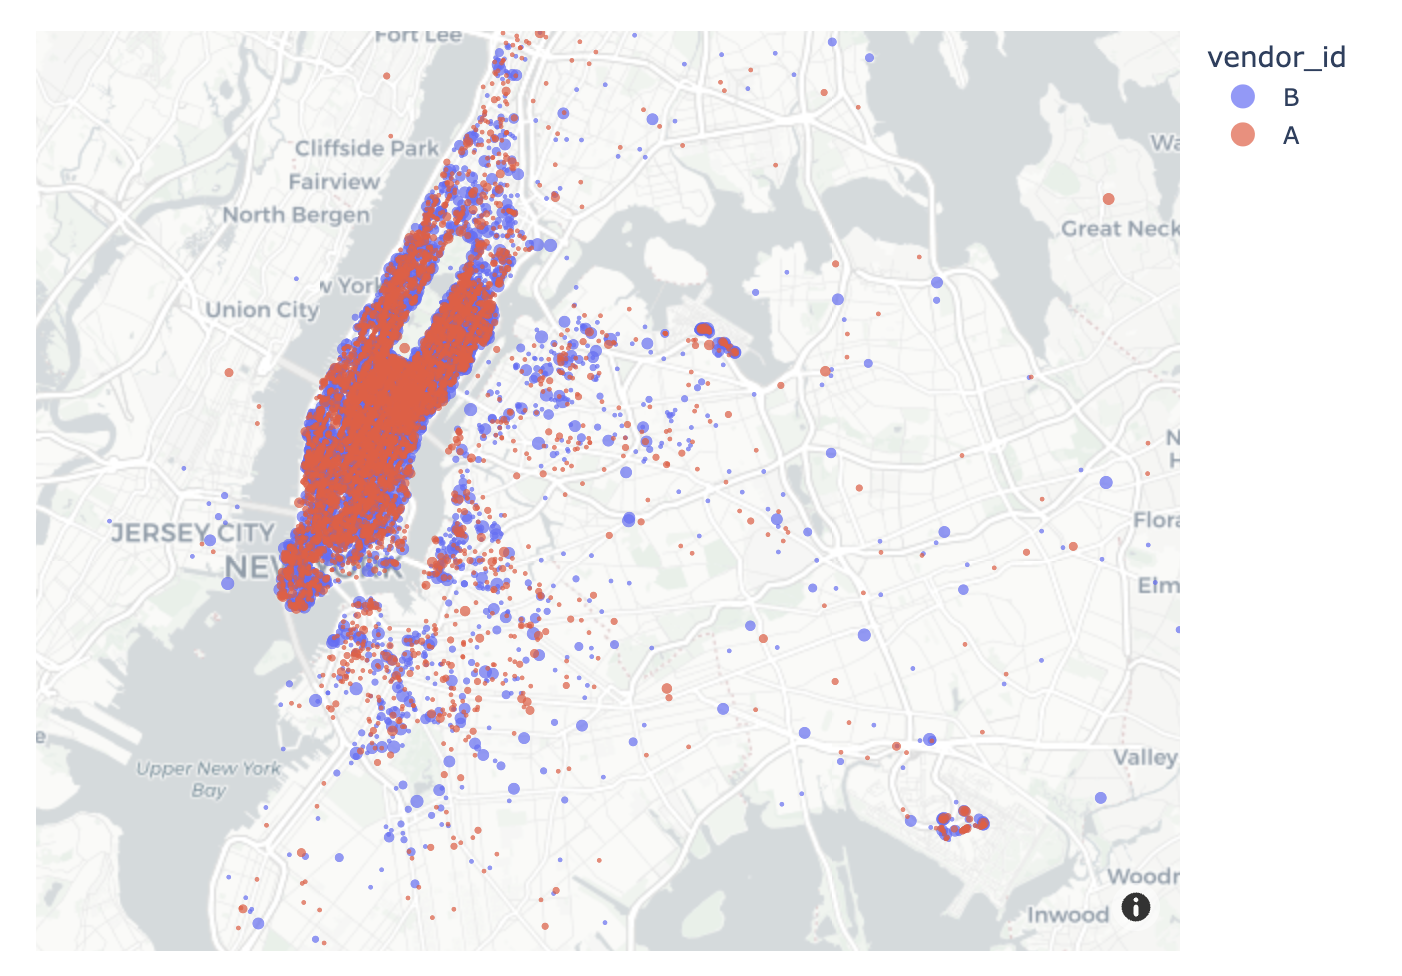